# predicting Score

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display # Allows the use of display() for DataFrames
# Pretty display for notebooks
%matplotlib inline

## read in the dataset

In [2]:
df = pd.read_csv("students.csv")

## explore the dataset

In [3]:
binary_or_not=[]
binary_col = []
def check_binary(col_name):
    if len(np.unique(df[col_name].values))==2:
        binary_or_not.append(1)
        binary_col.append(col_name)
    else:
        binary_or_not.append(0)

In [4]:
df.columns

Index([u'gender', u'NationalITy', u'PlaceofBirth', u'StageID', u'GradeID',
       u'SectionID', u'Topic', u'Semester', u'Relation', u'raisedhands',
       u'VisITedResources', u'AnnouncementsView', u'Discussion',
       u'ParentAnsweringSurvey', u'ParentschoolSatisfaction',
       u'StudentAbsenceDays', u'Class'],
      dtype='object')

In [5]:
for col in df.columns:
    check_binary(col)
print binary_or_not         

[1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0]


In [6]:
binary_col

['gender',
 'Semester',
 'Relation',
 'ParentAnsweringSurvey',
 'ParentschoolSatisfaction',
 'StudentAbsenceDays']

In [7]:
df.head(5)

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [8]:
df.describe()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
count,480.000000,480.000000,480.000000,480.000000
mean,46.775000,54.797917,37.918750,43.283333
std,30.779223,33.080007,26.611244,27.637735
min,0.000000,0.000000,0.000000,1.000000
25%,15.750000,20.000000,14.000000,20.000000
50%,50.000000,65.000000,33.000000,39.000000
75%,75.000000,84.000000,58.000000,70.000000
max,100.000000,99.000000,98.000000,99.000000


## correct column name

In [9]:
df['Nationality'] = df['NationalITy']
del df['NationalITy']

## check data type for each column

In [10]:
col_names=df.columns
for i in range(df.shape[1]):
    print (col_names[i],type(df.ix[0][i]))

('gender', <type 'str'>)
('PlaceofBirth', <type 'str'>)
('StageID', <type 'str'>)
('GradeID', <type 'str'>)
('SectionID', <type 'str'>)
('Topic', <type 'str'>)
('Semester', <type 'str'>)
('Relation', <type 'str'>)
('raisedhands', <type 'numpy.int64'>)
('VisITedResources', <type 'numpy.int64'>)
('AnnouncementsView', <type 'numpy.int64'>)
('Discussion', <type 'numpy.int64'>)
('ParentAnsweringSurvey', <type 'str'>)
('ParentschoolSatisfaction', <type 'str'>)
('StudentAbsenceDays', <type 'str'>)
('Class', <type 'str'>)
('Nationality', <type 'str'>)


## explore numerical feature distribution

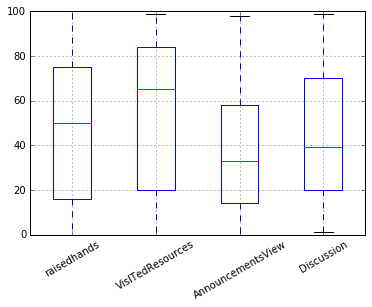

In [11]:
df.boxplot()
plt.xticks(rotation=30)
plt.show()

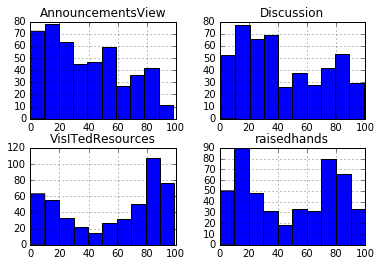

In [12]:
df.hist()
plt.show()

## relationship between numerical features

In [13]:
df.corr()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
raisedhands,1.000000,0.691572,0.643918,0.339386
VisITedResources,0.691572,1.000000,0.594500,0.243292
AnnouncementsView,0.643918,0.594500,1.000000,0.417290
Discussion,0.339386,0.243292,0.417290,1.000000


:0: FutureWarning: IPython widgets are experimental and may change in the future.


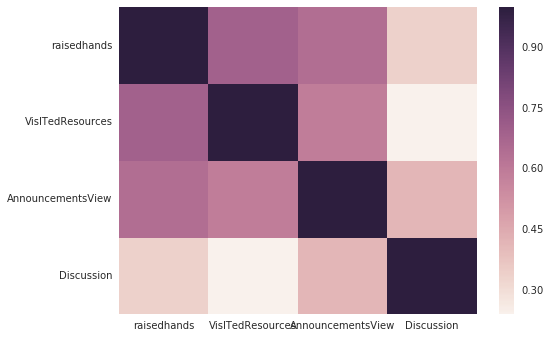

In [14]:
import seaborn as sns; 
sns.heatmap(df.corr())

/home/yanyan/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  from IPython.kernel.zmq import kernelapp as app


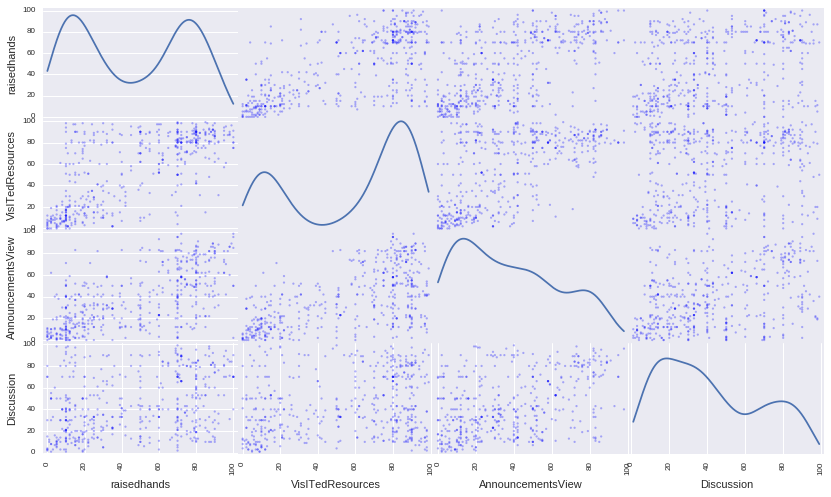

In [15]:
selected_data = df[['raisedhands','VisITedResources','AnnouncementsView','Discussion']]
pd.scatter_matrix(selected_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

## data preprocessing

In [16]:
# Split the data into features and target label
class_raw = df['Class']
features_raw = df.drop('Class', axis = 1)

In [17]:
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion']
features_minmax_transform = features_raw.copy()
features_minmax_transform[numerical] = scaler.fit_transform(df[numerical])

# Show an example of a record with scaling applied
display(features_minmax_transform.head(n = 5))

,gender,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Nationality
0,M,KuwaIT,lowerlevel,G-04,A,IT,F,Father,0.15,0.161616,0.020408,0.193878,Yes,Good,Under-7,KW
1,M,KuwaIT,lowerlevel,G-04,A,IT,F,Father,0.20,0.202020,0.030612,0.244898,Yes,Good,Under-7,KW
2,M,KuwaIT,lowerlevel,G-04,A,IT,F,Father,0.10,0.070707,0.000000,0.295918,No,Bad,Above-7,KW
3,M,KuwaIT,lowerlevel,G-04,A,IT,F,Father,0.30,0.252525,0.051020,0.346939,No,Bad,Above-7,KW
4,M,KuwaIT,lowerlevel,G-04,A,IT,F,Father,0.40,0.505051,0.122449,0.500000,No,Bad,Above-7,KW


In [18]:
from sklearn.preprocessing import LabelEncoder

# Encode the binary categorical data to numerical values
le = LabelEncoder()
for col in binary_col:
    features_minmax_transform[col] = le.fit_transform(features_minmax_transform[col])

## change multiclass to 2 class

In [19]:
def class_to_bool(label):
    if label == "H" or label == "M":
        return 0
    else:
        return 1
class_final = class_raw.apply(class_to_bool)

In [20]:
features_final = pd.get_dummies(features_minmax_transform)

In [21]:
X = features_final
y = class_final

In [22]:
X.columns

Index([u'gender', u'Semester', u'Relation', u'raisedhands',
       u'VisITedResources', u'AnnouncementsView', u'Discussion',
       u'ParentAnsweringSurvey', u'ParentschoolSatisfaction',
       u'StudentAbsenceDays', u'PlaceofBirth_Egypt', u'PlaceofBirth_Iran',
       u'PlaceofBirth_Iraq', u'PlaceofBirth_Jordan', u'PlaceofBirth_KuwaIT',
       u'PlaceofBirth_Lybia', u'PlaceofBirth_Morocco',
       u'PlaceofBirth_Palestine', u'PlaceofBirth_SaudiArabia',
       u'PlaceofBirth_Syria', u'PlaceofBirth_Tunis', u'PlaceofBirth_USA',
       u'PlaceofBirth_lebanon', u'PlaceofBirth_venzuela',
       u'StageID_HighSchool', u'StageID_MiddleSchool', u'StageID_lowerlevel',
       u'GradeID_G-02', u'GradeID_G-04', u'GradeID_G-05', u'GradeID_G-06',
       u'GradeID_G-07', u'GradeID_G-08', u'GradeID_G-09', u'GradeID_G-10',
       u'GradeID_G-11', u'GradeID_G-12', u'SectionID_A', u'SectionID_B',
       u'SectionID_C', u'Topic_Arabic', u'Topic_Biology', u'Topic_Chemistry',
       u'Topic_English', u'Topic

## train test split

In [23]:
from sklearn.cross_validation import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.2, 
                                                    random_state = 42)
# Show the results of the split
print X_train.shape
print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])

(384, 66)
Training set has 384 samples.
Testing set has 96 samples.


/home/yanyan/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## building models

## naive predictor

## Need a high precision model, meaning I wanted to detected any possbible 

In [24]:
'''
TP = np.sum(y) # Counting the ones as this is the naive case. 
FP = income.count() - TP # Specific to the naive case

TN = 0 # No predicted negatives in the naive case
FN = 0 # No predicted negatives in the naive case
'''
# Calculate accuracy, precision and recall
TP = np.sum(y) # Counting the ones as this is the naive case. 
FP = len(y) - TP # Specific to the naive case

TN = 0 # No predicted negatives in the naive case
FN = 0 # No predicted negatives in the naive case

accuracy = TP*1.0/len(y)
recall = TP*1.0 /(TP+FN)
precision = TP*1.0/len(y)

# Calculate F-score using the formula above for beta = 2 and correct values for precision and recall.
beta = 0.5
fscore = (1 + beta**2) * (precision * recall) / ((beta**2 * precision) + recall)

# Print the results 
print "Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore)

Naive Predictor: [Accuracy score: 0.2646, F-score: 0.3102]


In [25]:
from sklearn.svm import LinearSVC

clf = LinearSVC(random_state=0)
                           
clf.fit(X, y).predict(X)

array([0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1,

In [26]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import fbeta_score
results = {}
predictions_test = clf.predict(X_test)
predictions_train = clf.predict(X_train)
results['acc_train'] = accuracy_score(y_train, predictions_train)

# Compute accuracy on test set using accuracy_score()
results['acc_test'] = accuracy_score(y_test, predictions_test)

# Compute F-score on the the first 300 training samples using fbeta_score()
results['f_train'] = fbeta_score(y_train, predictions_train, average='micro', beta=0.5)

# Compute F-score on the test set which is y_test
results['f_test'] = fbeta_score(y_test, predictions_test, average='micro', beta=0.5)

In [27]:
results

{'acc_test': 0.95833333333333337,
 'acc_train': 0.9453125,
 'f_test': 0.95833333333333337,
 'f_train': 0.9453125}

In [28]:
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.utils import resample
from sklearn.metrics import make_scorer

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: class training set
       - X_test: features testing set
       - y_test: class testing set
    '''
    
    results = {}    
        
    # Fit the learner to the training data using 
    #slicing with 'sample_size' using .fit(training_features[:], training_labels[:])
    start = time() # Get start time
  
    X_train, y_train = X_train[:sample_size], y_train[:sample_size]
    
    learner = learner.fit(X_train, y_train)
    
    end = time() # Get end time
    
    # Calculate the training time
    results['train_time'] = end-start
        
    # Get the predictions on the test set(X_test),
    #       then get predictions on the first 300 training samples(X_train) 
    #using .predict()
    start = time() # Get start time

    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train)
    end = time() # Get end time
    
    # Calculate the total prediction time
    results['pred_time'] = end - start
            
    # Compute accuracy on the first 300 training samples which is y_train[:300]       
    results['acc_train'] = accuracy_score(y_train, predictions_train)
        
    # Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    
    # Compute F-score on the the first 300 training samples using fbeta_score()
    results['f_train'] = fbeta_score(y_train, predictions_train, average='micro', beta=0.5)
        
    # Compute F-score on the test set which is y_test
    results['f_test'] = fbeta_score(y_test, predictions_test, average='micro', beta=0.5)
       
    # Success
    print "{} trained on {} samples.".format(learner.__class__.__name__, sample_size)
        
    return results

In [29]:
import matplotlib.patches as mpatches
def evaluate(results, accuracy, f1):
    """
    Visualization code to display results of various learners.
    
    inputs:
      - learners: a list of supervised learners
      - stats: a list of dictionaries of the statistic results from 'train_predict()'
      - accuracy: The score for the naive predictor
      - f1: The score for the naive predictor
    """
  
    # Create figure
    fig, ax = plt.subplots(2, 3, figsize = (11,7))

    # Constants
    bar_width = 0.3
    colors = ['#A00000','#00A0A0','#00A000']
    
    # Super loop to plot four panels of data
    for k, learner in enumerate(results.keys()):
        for j, metric in enumerate(['train_time', 'acc_train', 'f_train', 'pred_time', 'acc_test', 'f_test']):
            for i in np.arange(3):
                
                # Creative plot code
                ax[j/3, j%3].bar(i+k*bar_width, results[learner][i][metric], width = bar_width, color = colors[k])
                ax[j/3, j%3].set_xticks([0.45, 1.45, 2.45])
                ax[j/3, j%3].set_xticklabels(["1%", "10%", "100%"])
                ax[j/3, j%3].set_xlabel("Training Set Size")
                ax[j/3, j%3].set_xlim((-0.1, 3.0))
    
    # Add unique y-labels
    ax[0, 0].set_ylabel("Time (in seconds)")
    ax[0, 1].set_ylabel("Accuracy Score")
    ax[0, 2].set_ylabel("F-score")
    ax[1, 0].set_ylabel("Time (in seconds)")
    ax[1, 1].set_ylabel("Accuracy Score")
    ax[1, 2].set_ylabel("F-score")
    
    # Add titles
    ax[0, 0].set_title("Model Training")
    ax[0, 1].set_title("Accuracy Score on Training Subset")
    ax[0, 2].set_title("F-score on Training Subset")
    ax[1, 0].set_title("Model Predicting")
    ax[1, 1].set_title("Accuracy Score on Testing Set")
    ax[1, 2].set_title("F-score on Testing Set")
    
    # Add horizontal lines for naive predictors
    ax[0, 1].axhline(y = accuracy, xmin = -0.1, xmax = 3.0, linewidth = 1, color = 'k', linestyle = 'dashed')
    ax[1, 1].axhline(y = accuracy, xmin = -0.1, xmax = 3.0, linewidth = 1, color = 'k', linestyle = 'dashed')
    ax[0, 2].axhline(y = f1, xmin = -0.1, xmax = 3.0, linewidth = 1, color = 'k', linestyle = 'dashed')
    ax[1, 2].axhline(y = f1, xmin = -0.1, xmax = 3.0, linewidth = 1, color = 'k', linestyle = 'dashed')
    
    # Set y-limits for score panels
    ax[0, 1].set_ylim((0, 1))
    ax[0, 2].set_ylim((0, 1))
    ax[1, 1].set_ylim((0, 1))
    ax[1, 2].set_ylim((0, 1))

    # Create patches for the legend
    patches = []
    for i, learner in enumerate(results.keys()):
        patches.append(mpatches.Patch(color = colors[i], label = learner))
    plt.legend(handles = patches, bbox_to_anchor = (-.80, 2.53), \
               loc = 'upper center', borderaxespad = 0., ncol = 3, fontsize = 'x-large')
    
    # Aesthetics
    plt.suptitle("Performance Metrics for Three Supervised Learning Models", fontsize = 16, y = 1.10)
    plt.tight_layout()
    plt.show()

DecisionTreeClassifier trained on 3 samples.
DecisionTreeClassifier trained on 38 samples.
DecisionTreeClassifier trained on 384 samples.
LogisticRegression trained on 3 samples.
LogisticRegression trained on 38 samples.
LogisticRegression trained on 384 samples.
LinearSVC trained on 3 samples.
LinearSVC trained on 38 samples.
LinearSVC trained on 384 samples.


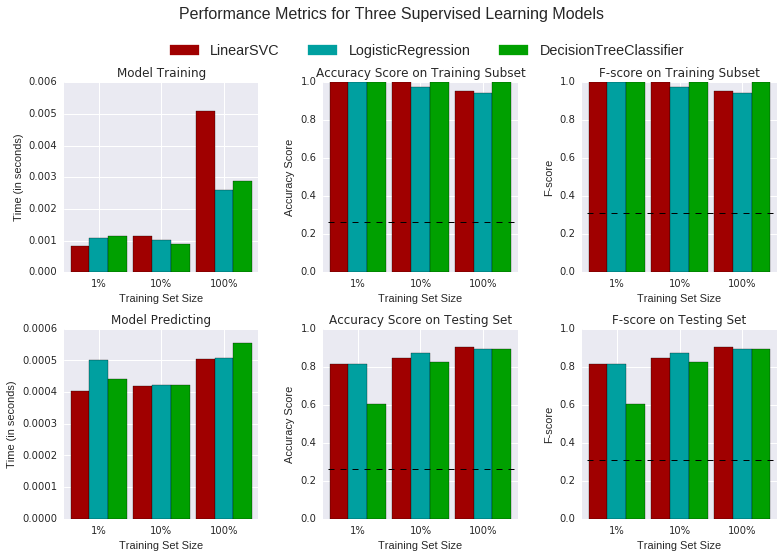

In [30]:
import visuals as vs
from time import time
from sklearn import tree
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import fbeta_score, make_scorer
import pprint

# Initialize the three models
clf_A = tree.DecisionTreeClassifier()
clf_B = LogisticRegression()
# clf_C = RandomForestClassifier()
clf_C = LinearSVC(random_state=0)

# Calculate the number of samples for 1%, 10%, and 100% of the training data
samples_100 = len(y_train)
samples_10 = int(0.1*len(y_train))
samples_1 = int(0.01*len(y_train))

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__

    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)
        
# Run metrics visualization for the three supervised learning models chosen
evaluate(results, accuracy, fscore)

In [31]:
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import fbeta_score, make_scorer

# Initialize the classifier
clf = tree.DecisionTreeClassifier()

# Create the parameters list you wish to tune, using a dictionary if needed.
parameters = {'max_depth': range(1,11)}

# Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score, beta=0.5)

# Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(clf, parameters,scoring=scorer)

# Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print "Unoptimized model\n------"
print "Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions))
print "F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5))
print "\nOptimized Model\n------"
print "Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions))
print "Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, 
                                                                     beta = 0.5))

Unoptimized model
------
Accuracy score on testing data: 0.9167
F-score on testing data: 0.8607

Optimized Model
------
Final accuracy score on the testing data: 0.9167
Final F-score on the testing data: 0.8607


/home/yanyan/anaconda/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


## confusion matrix

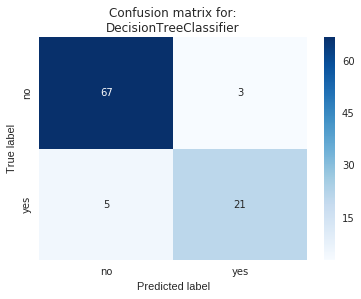

In [32]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute confusion matrix for a model
model = grid_fit.best_estimator_

cm = confusion_matrix(y_test, model.predict(X_test))
# view with a heatmap
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=['no', 'yes'], yticklabels=['no', 'yes'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix for:\n{}'.format(model.__class__.__name__));

## ROC curve

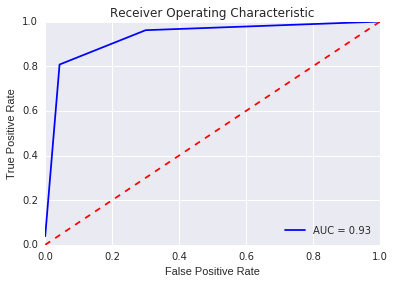

In [34]:
from sklearn import metrics
# calculate the fpr and tpr for all thresholds of the classification

probs = model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

##It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).


- Standardized equations

- sensitivity = recall = tp / t = tp / (tp + fn)
- specificity = tn / n = tn / (tn + fp)
- precision = tp / p = tp / (tp + fp)

- Sensitivity/recall – how good a test is at detecting the positives. A test can cheat and maximize this by always returning “positive”.
- Specificity – how good a test is at avoiding false alarms. A test can cheat and maximize this by always returning “negative”.
- Precision – how many of the positively classified were relevant. A test can cheat and maximize this by only returning positive on one result it’s most confident in.
The cheating is resolved by looking at both relevant metrics instead of just one. E.g. the cheating 100% sensitivity that always says “positive” has 0% specificity.

## feature importance

In [32]:
def feature_plot(importances, X_train, y_train):
    
    # Display the five most important features
    indices = np.argsort(importances)[::-1]
    columns = X_train.columns.values[indices[:5]]
    values = importances[indices][:5]

    # Creat the plot
    fig = pl.figure(figsize = (9,5))
    pl.title("Normalized Weights for First Five Most Predictive Features", fontsize = 16)
    pl.bar(np.arange(5), values, width = 0.6, align="center", color = '#00A000', \
          label = "Feature Weight")
    pl.bar(np.arange(5) - 0.3, np.cumsum(values), width = 0.2, align = "center", color = '#00A0A0', \
          label = "Cumulative Feature Weight")
    pl.xticks(np.arange(5), columns)    
    pl.xticks(rotation=90)
    pl.xlim((-0.5, 4.5))
    pl.ylabel("Weight", fontsize = 12)
    pl.xlabel("Feature", fontsize = 12)
    
    pl.legend(loc = 'upper center')
    pl.tight_layout()
    pl.show()  

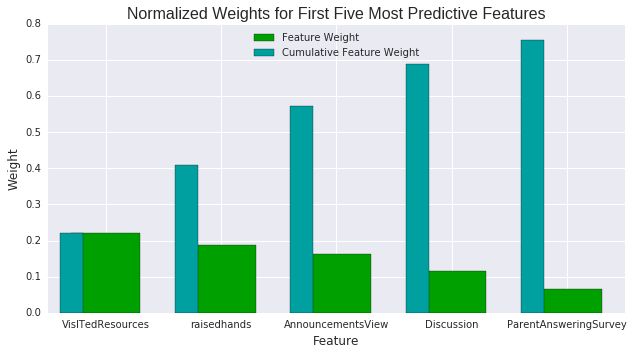

In [33]:
#http://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html
from sklearn.ensemble import RandomForestClassifier

# Train the supervised model on the training set using .fit(X_train, y_train)
model=RandomForestClassifier(max_depth=2, random_state=0)
model.fit(X_train, y_train)

# Extract the feature importances using .feature_importances_ 
importances = model.feature_importances_

# Plot
vs.feature_plot(importances, X_train, y_train)

## feature selection

In [34]:
# Import functionality for cloning a model
from sklearn.base import clone

# Reduce the feature space
X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:5]]]
X_test_reduced = X_test[X_test.columns.values[(np.argsort(importances)[::-1])[:5]]]

# Train on the "best" model found from grid search earlier
clf = RandomForestClassifier(max_depth=2, random_state=0)
time1 = time()
clf = clf.fit(X_train_reduced, y_train)
print "this is the dim of the reduced data"
print X_train_reduced.shape
time2 = time()
train_time = time2 - time1

# Make new predictions
time3 = time()
reduced_predictions = clf.predict(X_test_reduced)
time4 = time()
test_time = time4 - time3

# not reduced
time5 = time()
clf = clf.fit(X_train, y_train)
print "this is the dim of the non_reduced data"
print X_train.shape
time6 = time()
train_time2 = time6 - time5

# Make new predictions
time7 = time()
predictions =clf.predict(X_test)
time8 = time()
test_time2 = time8 - time7

# Report scores from the final model using both versions of data
print "\nFinal Model trained on reduced data\n------"
print "Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, reduced_predictions))
print "F-score on testing data: {:.4f}".format(fbeta_score(y_test, reduced_predictions, beta = 0.5))
print "reduced feature train time is {}".format(train_time)
print "reduced feature test_time is {}".format(test_time)

print "Final Model trained on full data\n------"
print "Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, best_predictions))
print "F-score on testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5))
print "full feature train time is {}".format(train_time2)
print "full feature test_time is {}".format(test_time2)

this is the dim of the reduced data
(384, 5)
this is the dim of the non_reduced data
(384, 66)

Final Model trained on reduced data
------
Accuracy on testing data: 0.8438
F-score on testing data: 0.7143
reduced feature train time is 0.0422179698944
reduced feature test_time is 0.009281873703
Final Model trained on full data
------
Accuracy on testing data: 0.9167
F-score on testing data: 0.8607
full feature train time is 0.0389277935028
full feature test_time is 0.0094780921936


## clustering, pretending there is no label

In [35]:
samples = X.ix[[1,400],:]

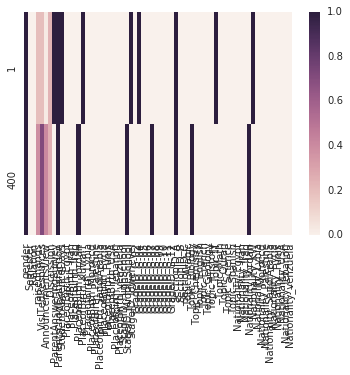

In [36]:
import seaborn as sns; 
ax = sns.heatmap(samples)

In [37]:
X_reduced = X[X.columns.values[(np.argsort(importances)[::-1])[:5]]]

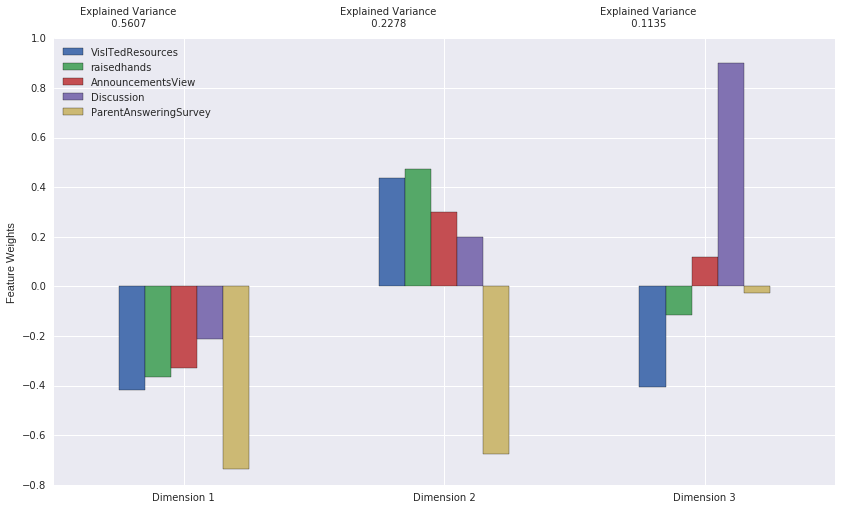

In [38]:
# Apply PCA by fitting the good data with the same number of dimensions as features
from sklearn.decomposition import PCA 
import visuals_PCA as vs
pca = PCA(n_components=3)
pca.fit(X_reduced)

#Transform log_samples using the PCA fit above
pca_samples = pca.transform(X_reduced)

# Generate PCA results plot
pca_results = vs.pca_results(X_reduced, pca)